# MLE and MAP estimation
Data Mining Lab, UVic Summer 2020  <br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli distribution
Suppose we flip a coin $n$ times and count the number of heads, $\alpha_H$, and the number of tails, $\alpha_T$. Note that $\alpha_H + \alpha_T = n$. Let $\theta$ be the probability of the coin in a single flip to give head, assumed to be constant during our experiment. The probability of observing $\alpha_H$ heads and $\alpha_T$ tails, given $\theta$, is

$$P\left( D = (\alpha_H, \alpha_T) | \theta \right) = \theta^{\alpha_H} (1-\theta)^{\alpha_T}$$

Now, in our experiment we only observe $\alpha_H$ and $\alpha_T$, but we do not observe $\theta$. We can estimate the value of $\theta$ from the result of our observation.

__MLE:__
$$\hat{\theta}_{\rm MLE} = \frac{\alpha_H}{\alpha_H + \alpha_T}$$

Suppose we have an information that tells us that the value of $\theta$ is, say, $\theta_{\rm PRIOR}$. We can combine this prior knowledge with our observation to get estimate. 

__MAP estimate:__
$$\hat{\theta}_{\rm MAP} = \frac{(\alpha_H + \gamma_H)}{(\alpha_H + \gamma_H) + (\alpha_T + \gamma_T)}$$

Here $\gamma_H$ and $\gamma_T$ are values that we chose such that $\gamma_H / (\gamma_H + \gamma_T) = \alpha_{\rm PRIOR}$. Their values depend on how much our confidence is on the prior knowledge. The more our confidence is, the larger $\gamma_H$ and $\gamma_T$ are. For example, suppose $\theta_{\rm PRIOR} = 0.6$. We can choose $\gamma_H = 6$ and $\gamma_T = 4$ (low confidence), or $\gamma_H = 60$ and $\gamma_T = 40$ (higher confidence).

In [3]:
# for a single coin flip:
def coin_flip(p):
    r = np.random.rand()  # generate a random number in [0,1)
    if r < p :   # head
        return 1
    else :       # tail
        return 0

In [4]:
# set the constants
N = 250       # max number of flips
theta = 0.5  # the real value of theta

# Lists to record the observation/estimates
MLE = []
# initiate counters
a_H = 0
a_T = 0
for j in range(N):
    a_H = a_H + coin_flip(theta)
    a_T = (j+1) - a_H    # (j+1) is the number of flips in that iteration 
    mle = a_H/(a_H + a_T)
    HList.append(a_H)
    MLE.append(mle)
    

# for checking:
#print(HList)  # This should be monotonous
#print(MLE)
#print(MAP)

In [11]:
# set the constants
N = 250       # max number of flips
theta = 0.5  # the real value of theta
g_H = 6     # assuming theta_PRIOR = 0.6
g_T = 4
HList = []    # for checking
MAP = []
# initiate counters
a_H = 0
a_T = 0
for j in range(N):
    a_H = a_H + coin_flip(theta)
    a_T = (j+1) - a_H    # (j+1) is the number of flips in that iteration 
    mape = (a_H + g_H)/((a_H + g_H) + (a_T + g_T))
    HList.append(a_H)
    MAP.append(mape)


In [12]:
# Set the x (number of flips):
x = np.arange(1, N+1)
# The real theta line, for reference:
RLine = (theta, theta)
xx = (0, N+1)

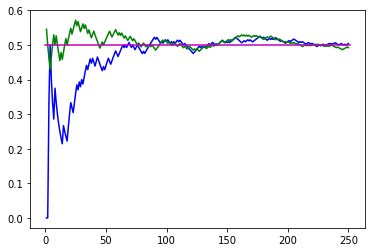

In [13]:
# b = Blue, g = Green, m = Magenta
plt.plot(x,MLE, color="b")
plt.plot(x,MAP, color="g")
plt.plot(xx, RLine, color="m")
plt.show()

The plot above is similar to the ones in the reading (Mitchell), Figure 1. Note that due to the random nature of the experiment we will not get the exact same result if we repeat the experiment. Sometimes, the estimates might not even seem to converge to the reference line.  

Try also with different values of g_H and g_T.

Next, we are going to do an experiment of $N_T$ trials. In the first trial we flip the coin once. In the second trial, we start over again and flip the coin twice. In the third, three times. And so on. This is to make sure that the result of the $k^{\rm th}$ trial is independent of the result of the $(k-1)^{\rm th}$ trial (unlike the one above). 

In [14]:
# set the constants
N_T = 200       # number of trials
theta = 0.5  # the real value of theta
g_H = 6
g_T = 4
# Lists to record the observation/estimates
HList = []    # for checking
MLE = []
MAP = []
for j in range(N_T):
    # initiate/reset counters
    a_H = 0
    a_T = 0
    for k in range(j):
        a_H = a_H + coin_flip(theta)
    a_T = (j+1) - a_H    # (j+1) is the number of flips in that iteration 
    mle = a_H/(a_H + a_T)
    mape = (a_H + g_H)/((a_H + g_H) + (a_T + g_T))
    HList.append(a_H)
    MLE.append(mle)
    MAP.append(mape)

# for checking:
#print(HList)  # Since each trial is independent, this does not need to be monotonous
#print(MLE)
#print(MAP)

In [15]:
# Set the x (number of flips):
x = np.arange(1, N_T+1)
# The real theta line, for reference:
RLine = (theta, theta)
xx = (0, N_T+1)

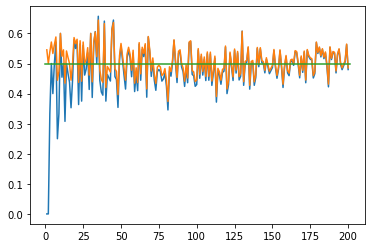

In [16]:
plt.plot(x,MLE)
plt.plot(x,MAP)
plt.plot(xx, RLine)
plt.show()

## Univariate Normal Distribution:
The probability of getting $x$ drawn from a normal distribution $N(\mu, \sigma^2)$ is

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2} $$

where $\mu$ is the mean, and $\sigma$ is the standard deviation.

Here, for simplicity let us assume that the real standard deviation, $\sigma$, is known. So we only need to estimate $\mu$. 

__MLE:__ 
$$\hat{\mu}_{\rm MLE} = \frac{1}{n} \sum_{j=1}^n x_j,$$
and 
\begin{equation}
\hat{\sigma}_{MLE} = \sqrt{\frac{1}{n}\sum_{i}^{n}(x_i - \mu)^2}
\end{equation}
but, we can use $\hat{\mu}_{MLE}$ instead of $\mu$. 

With prior $N(\mu_0, \sigma_m^2)$, <br>
__MAP estimate:__  
$$\hat{\mu}_{\rm MAP} = \frac{\sigma_m^2 \left(\sum_{j=1}^n x_j \right) + \sigma^2 \mu_0}{\sigma_m^2 n + \sigma^2}$$



In [26]:
# set the constants
N = 250       # max number of draws
mu = 0.0      # the real value of mu
sigma = 1.0   # the real value of sigma
mu_0 = 1.0       # the prior mu
sigma_m = 2.0    # the prior sigma
# Lists to record the observation/estimates
MLE = []
MAP = []
MLE_sigma = []
# initiate the sum
sum_x = 0
list_x = []
for j in range(N):
    x = np.random.normal(mu, sigma)  # Note that we input sigma, not sigma^2 (see the API)
    list_x.append(x)
    sum_x = sum_x + x
    n = j+1
    mle = sum_x/n
    squared_sum = 0
    for x in list_x:
        squared_sum += (x - mle)**2
    mle_sigma = math.sqrt((1/(j+1))*squared_sum)
    MLE.append(mle)
    MLE_sigma.append(mle_sigma)
    
# for checking:
#print(MLE)
#print(MAP)

In [27]:
# set the constants
N = 250       # max number of draws
mu = 0.0      # the real value of mu
sigma = 1.0   # the real value of sigma
mu_0 = 1.0       # the prior mu
sigma_m = 2.0    # the prior sigma
# Lists to record the observation/estimates
MAP = []
for j in range(N):
    x = np.random.normal(mu, sigma)  # Note that we input sigma, not sigma^2 (see the API)
    list_x.append(x)
    sum_x = sum_x + x
    n = j+1
    mape = (sigma_m*sigma_m*sum_x + sigma*sigma*mu_0)/(sigma_m*sigma_m*n + sigma*sigma)
    MAP.append(mape)


In [28]:
# Set the x (number of flips):
x = np.arange(1, N+1)
# The real theta line, for reference:
RLine = (mu, mu)
xx = (0, N+1)

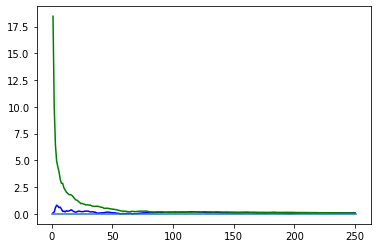

In [29]:
plt.plot(x,MLE, color="b")
plt.plot(x,MAP, color="g")
plt.plot(xx, RLine)
plt.show()

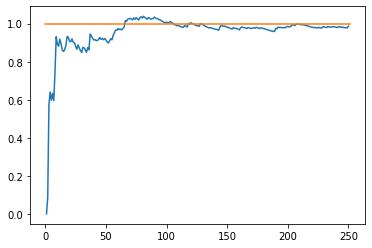

In [30]:
plt.plot(x, MLE_sigma)
plt.plot(xx, (sigma, sigma))
plt.show()

# Logistic Regression

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
# without above line matplotlib will not work in notebook
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [33]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

(100, 4)
(50, 4)


In [34]:
model = LogisticRegression(C=1e5, multi_class="multinomial", solver="lbfgs", penalty="l2")
# remember that small value of C implies stronger regularization
model.fit(X_train, y_train)
predictions = model.predict(X_test) 

C:\Users\Hamid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
print(metrics.accuracy_score(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

0.98
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
X_train, X_test = X_train[:,:2], X_test[:,:2]
print(X_train.shape)
print(X_test.shape)

model = LogisticRegression(C=1e5, multi_class="multinomial", solver="lbfgs")
model.fit(X_train, y_train)
predictions = model.predict(X_test) 
print(metrics.accuracy_score(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

(60, 2)
(90, 2)
0.8
[[35  0  0]
 [ 0 19 10]
 [ 0  8 18]]


In [38]:
# Examples the model predicted wrong
print(predictions[predictions != y_test])
print(y_test[predictions != y_test])
print(X_test[predictions != y_test])

[2 2 2 1 2 1 2 2 2 1 2 1 1 1 1 2 1 2]
[1 1 1 2 1 2 1 1 1 2 1 2 2 2 2 1 2 1]
[[6.8 2.8]
 [6.3 3.3]
 [6.7 3.1]
 [6.3 2.5]
 [6.4 3.2]
 [5.8 2.7]
 [6.  3.4]
 [6.7 3.1]
 [6.6 3. ]
 [6.3 2.7]
 [6.2 2.9]
 [5.7 2.5]
 [6.  3. ]
 [5.8 2.7]
 [6.4 2.7]
 [6.7 3. ]
 [5.8 2.8]
 [5.9 3.2]]


In [39]:
# Training errors
X_train[model.predict(X_train) != y_train]

array([[6.1, 2.6],
       [6. , 2.2],
       [6.5, 2.8],
       [6.2, 2.8],
       [7. , 3.2],
       [6.1, 3. ],
       [6.6, 2.9],
       [6.9, 3.1],
       [6.4, 2.9],
       [5.6, 2.8],
       [5.9, 3. ],
       [4.9, 2.5]])

In [40]:
probabilities = model.predict_proba(X_test)
print(probabilities)
print(np.argmax(probabilities, axis=1))
print(predictions)

[[2.33269998e-25 5.57105411e-01 4.42894589e-01]
 [9.99813075e-01 4.90899064e-05 1.37835323e-04]
 [1.32996687e-66 1.86285363e-01 8.13714637e-01]
 [4.07201121e-21 5.44991722e-01 4.55008278e-01]
 [1.04336324e-41 3.38178648e-01 6.61821352e-01]
 [9.99289747e-01 3.66541265e-04 3.43711466e-04]
 [8.24660224e-12 6.67127803e-01 3.32872197e-01]
 [2.21080230e-38 2.08648299e-01 7.91351701e-01]
 [3.29997703e-39 7.62545984e-01 2.37454016e-01]
 [2.67288691e-20 6.88509095e-01 3.11490905e-01]
 [4.18359708e-27 2.69731725e-01 7.30268275e-01]
 [1.00000000e+00 3.34044467e-10 7.11062157e-11]
 [9.98102446e-01 8.34511804e-04 1.06304214e-03]
 [9.99999999e-01 7.61430387e-10 2.20181253e-10]
 [1.00000000e+00 7.29630485e-19 9.46520293e-19]
 [1.59484567e-20 2.85720600e-01 7.14279400e-01]
 [6.83732910e-31 3.45096292e-01 6.54903708e-01]
 [1.61994059e-19 8.03112417e-01 1.96887583e-01]
 [4.69614501e-16 6.77911566e-01 3.22088434e-01]
 [2.35265697e-32 4.60916559e-01 5.39083441e-01]
 [1.00000000e+00 2.11578199e-16 5.649333

[[3.8  3.82 3.84 ... 8.14 8.16 8.18]
 [3.8  3.82 3.84 ... 8.14 8.16 8.18]
 [3.8  3.82 3.84 ... 8.14 8.16 8.18]
 ...
 [3.8  3.82 3.84 ... 8.14 8.16 8.18]
 [3.8  3.82 3.84 ... 8.14 8.16 8.18]
 [3.8  3.82 3.84 ... 8.14 8.16 8.18]]
!
[[1.7  1.7  1.7  ... 1.7  1.7  1.7 ]
 [1.72 1.72 1.72 ... 1.72 1.72 1.72]
 [1.74 1.74 1.74 ... 1.74 1.74 1.74]
 ...
 [4.44 4.44 4.44 ... 4.44 4.44 4.44]
 [4.46 4.46 4.46 ... 4.46 4.46 4.46]
 [4.48 4.48 4.48 ... 4.48 4.48 4.48]]


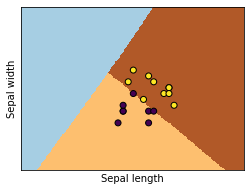

In [42]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
print(xx)
print ("!")
print(yy)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the points
prediction = model.predict(X_test)
mistake_index = (prediction != y_test)
temp_index0 = y_test == 0
temp_index1 = y_test == 1
temp_index2 = y_test == 2
c = np.array(mistake_index).astype(int)
c0 = np.array(temp_index0).astype(int)
c1 = np.array(temp_index1).astype(int)
c2 = np.array(temp_index2).astype(int)
index0 = c + c0
index1 = c + c1
index2 = c + c2


mistakes = X_test[mistake_index]
mistakes0 = X_test[index0 == 2]
mistakes1 = X_test[index1 == 2]
mistakes2 = X_test[index2 == 2]
plt.scatter(mistakes[:,0], mistakes[:, 1], edgecolors='k', c=prediction[mistake_index])
#plt.scatter(mistakes1[:,0], mistakes1[:, 1], edgecolors='k', color='b')
#plt.scatter(mistakes2[:,0], mistakes2[:, 1], edgecolors='k', color='m')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


(75, 2)
(75, 2)
0.48


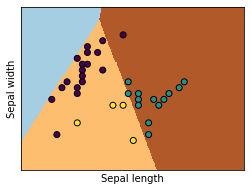

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_test = X_train[:,:2], X_test[:,:2]
print(X_train.shape)
print(X_test.shape)

# smaller values specify stronger regularization
model = LogisticRegression(C=0.01, multi_class="multinomial", solver="newton-cg", penalty="l2")
model.fit(X_train, y_train)
predictions = model.predict(X_test) 
print(metrics.accuracy_score(y_test, predictions))

x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
# plt.scatter(X_train[:, 0], X_train[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
mistakes = X_train[model.predict(X_train) != y_train]
plt.scatter(mistakes[:,0], mistakes[:, 1], edgecolors='k', c=y_train[model.predict(X_train) != y_train])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()